In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/u2v-data-cs-aware/u2v_test.txt
/kaggle/input/u2v-data-cs-aware/u2v_train.txt
/kaggle/input/u2v-data-cs-aware/u2v_test.xlsx
/kaggle/input/u2v-data-cs-aware/u2v_train_lb.xlsb.xlsx
/kaggle/input/first-data-3/first_data_3.csv


***CIME*** provides online functionalities as services to geolocate tweets from their text and metadata. It is based on Open Street Map to support the disambiguation of localities extracted with a **NER** (using Polyglot or Stanford core NLP). The results contain locations both in textual form and as coordinates, as described below. 

The functionalities to extract locations from texts can be applied also to posts extracted from other social media. 

In [2]:
df = pd.read_csv('/kaggle/input/first-data-3/first_data_3.csv')
print(df.shape)
df

(99, 11)


,Unnamed: 0,tweet_id,text,created_at,lang,geo,u_id,u_name,username,location,verified
0,0,1582849884184449024,"@Raygeki3 OLHA ELE AI, RAZOU!",2022-10-19 21:43:14+00:00,pt,NaN,1274541965284171778,Hexenwitch,hexenwitch_,"São Paulo, Brasil",False
1,1,1582849883597205509,RT @raphael_ig: @Rollo_oficial Olha ai https:/...,2022-10-19 21:43:14+00:00,pt,NaN,1521619273055191041,Valdinéia Pereira Alves,ValdineiaP45,"Duque de Caxias, Brasil",False
2,2,1582849883530178560,RT @Samirasta1011: .IC #TigrayUnderAttack ;\na...,2022-10-19 21:43:14+00:00,en,NaN,1512158114887442432,ሪመይ ወለላ,ami_hagos,NaN,False
3,3,1582849883450769408,.@vmyths How many died?\n\nhttps://t.co/KgeYNA...,2022-10-19 21:43:14+00:00,en,NaN,97242126,Chuck Petras,Chuck_Petras,"Eastern Washington State, USA",False
4,4,1582849883312005120,"RT @RrBarito: Cet après-midi, j'ai appelé pou...",2022-10-19 21:43:14+00:00,fr,NaN,1557109203164069897,mamy do,mamydo06,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
94,94,1582849871106965504,"Y’all can 302 me all y’all want , it’s a pathe...",2022-10-19 21:43:11+00:00,en,NaN,3165465262,claudia 👸🏽,claudia_ameliax,"Philadelphia, PA",False
95,95,1582849870842728449,AIに「『FF7』のセフィロスが泳いでいるイラスト」を描かせよう···https://t.c...,2022-10-19 21:43:11+00:00,ja,NaN,1288800190002913280,ゑめぞう,emerarurdpique,NaN,False
96,96,1582849870662340609,@AC_TEMPLIER Pour moi c'est ma licence de cœur...,2022-10-19 21:43:11+00:00,fr,NaN,1020274294008500227,yohann_art,PaisantYohann,France,False
97,97,1582849870620430336,https://t.co/SMHTY8F4lU Mükemmeliyete diğerler...,2022-10-19 21:43:11+00:00,tr,NaN,1563663675130388480,Asya,Asya01703059,konak izmir türkiye,False


In [3]:
df = pd.read_excel('/kaggle/input/u2v-data-cs-aware/u2v_test.xlsx')
print(df.shape)
df['text'] = df['full_text']
df['language'] = df['lang']

(560, 34)


In [4]:
df = df[df['label'] == 1]
df = df[df['language'] != 'en']

df = df.reset_index(drop = True)

In [5]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,author_id,lang,conversation_id,created_at,edit_history_tweet_ids,full_text,label,...,description,user_location,full_text1,predictions,geo.coordinates.type,geo.coordinates.coordinates,entities.cashtags,full_text_clean,text,language
0,0,2668,2668,11791512,ro,1407658084814708736,Wed Jun 23 11:13:35 +0000 2021,['1407658084814708736'],Random recipe password generator. https://t.co...,1,...,Award-winning computer security keynote speake...,@gcluley@mastodon.green,random recipe password generator.,0.997680,NaN,NaN,NaN,random recipe password generator,Random recipe password generator. https://t.co...,ro
1,20,2674,2674,34204102,ro,1156093768543506432,Tue Jul 30 06:46:48 +0000 2019,['1156093768543506432'],ALERT: Multiple vulnerabilities found in recen...,1,...,"AU's pioneer Cyber Emergency Response Team, pr...","Brisbane, Australia | Meanjin",alert: vulnerability version vxworks asb-2019....,0.977912,NaN,NaN,NaN,alert vulnerability version vxworks asb,ALERT: Multiple vulnerabilities found in recen...,ro
2,40,2673,2673,50026664,ro,1620455656204472322,Tue Jan 31 16:15:09 +0000 2023,['1620455656204472322'],Exploit released for critical VMware vRealize ...,1,...,"Breaking technology news, security guides, and...",New York,exploit released critical vmware vrealize rce ...,0.978110,NaN,NaN,NaN,exploit released critical vmware vrealize rce ...,Exploit released for critical VMware vRealize ...,ro
3,41,2676,2676,50026664,ro,1559330745356894213,Tue Aug 16 00:06:35 +0000 2022,['1559330745356894213'],Argentina's Judiciary of Córdoba hit by PLAY r...,1,...,"Breaking technology news, security guides, and...",New York,argentina's judiciary córdoba play ransomware ...,0.933802,NaN,NaN,NaN,argentina judiciary rdoba play ransomware atta...,Argentina's Judiciary of Córdoba hit by PLAY r...,ro
4,80,1692,1692,64812324,it,1326184195463536642,Tue Nov 10 15:25:26 +0000 2020,['1326184195463536642'],Warning: Cisco patched critical vulnerabilitie...,1,...,CERT.be is the federal cyber emergency team fo...,Belgium,warning: cisco patched critical vulnerability ...,0.991814,NaN,NaN,NaN,warning cisco patched critical vulnerability c...,Warning: Cisco patched critical vulnerabilitie...,it
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,554,1541,1541,1290574179729891336,pl,1499298797926629380,2022-03-03T08:21:03.000Z,['1499298797926629380'],Informacje dotyczące zagrożenia #HermeticWiper...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,informacje dotycz zagro enia hermeticwiper,Informacje dotyczące zagrożenia #HermeticWiper...,pl
142,555,1542,1542,1290574179729891336,pl,1572501963421650944,2022-09-21T08:24:18.000Z,['1572501963421650944'],Zapraszamy do zapoznania się z najnowszą publi...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zapraszamy zapoznania najnowsz publikacj temat...,Zapraszamy do zapoznania się z najnowszą publi...,pl
143,556,1543,1543,1290574179729891336,pl,1501537347187658755,2022-03-09T12:36:15.000Z,['1501537347187658755'],Informacje dotyczące zagrożenia #HermeticWiper...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,informacje dotycz zagro enia hermeticwiper,Informacje dotyczące zagrożenia #HermeticWiper...,pl
144,557,1544,1544,1290574179729891336,pl,1509799545479254024,2022-04-01T07:47:17.000Z,['1509799545479254024'],Dostępna jest nowa wersja #iOS - 15.4.1. Aktua...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pna nowa wersja aktualizacja ata podatno cve k...,Dostępna jest nowa wersja #iOS - 15.4.1. Aktua...,pl


In [6]:
from unidecode import unidecode
def remove_diacritics(text):
    return unidecode(text)
df['text'] = df['text'].apply(remove_diacritics)

using spicy library to analize tweets and show how NER works


In [7]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins

In [8]:
!pip install pyicu 
!pip install pycld2
!pip install morfessor
!pip install py3langid
!pip install polyglot
#!pip install -U git+https://github.com/aboSamoor/polyglot.git@master
!pip install geopy
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pyicu: filename=PyICU-2.11-cp37-cp37m-linux_x86_64.whl size=1908191 sha256=80dc25205348e29a5909ef1b8edfa59e157683a1c4bf549c05aba133607d48f6
  Stored in directory: /root/.cache/pip/wheels/db/00/3b/1c2b09bf0b4a0f40c572a4f70642e8e164c137474ab69901b2
Successfully built pyicu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9918570 sha256=61f41b50aef64e7f9c80d1f8e3e7a8ec62ef0ae1fdadbcfa1ee9f518298d2094
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built pycld2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
#using spicy library to analize tweets and show how NER works
import urllib.request
import spacy
from spacy import displacy
import polyglot
from polyglot.text import Text, Word
import unidecode

for i in range(len(df)):
    print('\n'+str(i)+')')
    #print(df.text[i])
    text = Text(df.text[i])
    print("Language Detected: Code={}, Name={}".format(text.language.code, text.language.name))
    command = "en_core_web_sm"
    NER = spacy.load(command)
    raw_text = df.text[i]
    text = NER (raw_text)
    displacy.render(text,style="ent",jupyter=True)
    url_location = ''
    for word in text.ents:
        if (word.label_ == 'GPE'):
            #print(word.text + '\n')
            url_location = '+'.join(word.text.split())
            normalized_url_location = unidecode.unidecode(url_location)
            #print("Response Status: "+ str(get_url.getcode()))
            get_url= urllib.request.urlopen('https://nominatim.openstreetmap.org/search/' + normalized_url_location + '?format=json&addressdetails=1&limit=1')
            #print(get_url.read())


0)
Language Detected: Code=en, Name=English



1)
Language Detected: Code=en, Name=English



2)
Language Detected: Code=en, Name=English



3)
Language Detected: Code=en, Name=English



4)
Language Detected: Code=en, Name=English



5)
Language Detected: Code=en, Name=English



6)
Language Detected: Code=en, Name=English



7)
Language Detected: Code=en, Name=English



8)
Language Detected: Code=en, Name=English



9)
Language Detected: Code=en, Name=English



10)
Language Detected: Code=en, Name=English



11)
Language Detected: Code=en, Name=English



12)
Language Detected: Code=en, Name=English



13)
Language Detected: Code=en, Name=English



14)
Language Detected: Code=en, Name=English



15)
Language Detected: Code=en, Name=English



16)
Language Detected: Code=en, Name=English


/opt/conda/lib/python3.7/site-packages/spacy/displacy/__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)



17)
Language Detected: Code=en, Name=English



18)
Language Detected: Code=es, Name=Spanish



19)
Language Detected: Code=es, Name=Spanish



20)
Language Detected: Code=es, Name=Spanish



21)
Language Detected: Code=en, Name=English



22)
Language Detected: Code=es, Name=Spanish



23)
Language Detected: Code=es, Name=Spanish



24)
Language Detected: Code=es, Name=Spanish



25)
Language Detected: Code=es, Name=Spanish



26)
Language Detected: Code=en, Name=English



27)
Language Detected: Code=en, Name=English



28)
Language Detected: Code=es, Name=Spanish



29)
Language Detected: Code=en, Name=English



30)
Language Detected: Code=en, Name=English



31)
Language Detected: Code=en, Name=English



32)
Language Detected: Code=en, Name=English



33)
Language Detected: Code=es, Name=Spanish



34)
Language Detected: Code=es, Name=Spanish



35)
Language Detected: Code=es, Name=Spanish



36)
Language Detected: Code=es, Name=Spanish



37)
Language Detected: Code=es, Name=Spanish



38)
Language Detected: Code=es, Name=Spanish



39)
Language Detected: Code=en, Name=English



40)
Language Detected: Code=en, Name=English



41)
Language Detected: Code=it, Name=Italian



42)
Language Detected: Code=it, Name=Italian



43)
Language Detected: Code=en, Name=English



44)
Language Detected: Code=en, Name=English



45)
Language Detected: Code=it, Name=Italian



46)
Language Detected: Code=en, Name=English



47)
Language Detected: Code=it, Name=Italian



48)
Language Detected: Code=it, Name=Italian



49)
Language Detected: Code=it, Name=Italian



50)
Language Detected: Code=it, Name=Italian



51)
Language Detected: Code=it, Name=Italian



52)
Language Detected: Code=it, Name=Italian



53)
Language Detected: Code=it, Name=Italian



54)
Language Detected: Code=it, Name=Italian



55)
Language Detected: Code=it, Name=Italian



56)
Language Detected: Code=it, Name=Italian



57)
Language Detected: Code=en, Name=English



58)
Language Detected: Code=fr, Name=French



59)
Language Detected: Code=fr, Name=French



60)
Language Detected: Code=fr, Name=French



61)
Language Detected: Code=fr, Name=French



62)
Language Detected: Code=en, Name=English



63)
Language Detected: Code=uz, Name=Uzbek



64)
Language Detected: Code=da, Name=Danish



65)
Language Detected: Code=uz, Name=Uzbek



66)
Language Detected: Code=en, Name=English



67)
Language Detected: Code=da, Name=Danish



68)
Language Detected: Code=da, Name=Danish



69)
Language Detected: Code=da, Name=Danish



70)
Language Detected: Code=uz, Name=Uzbek



71)
Language Detected: Code=da, Name=Danish



72)
Language Detected: Code=da, Name=Danish



73)
Language Detected: Code=en, Name=English



74)
Language Detected: Code=kha, Name=Khasi



75)
Language Detected: Code=kha, Name=Khasi



76)
Language Detected: Code=ms, Name=Malay



77)
Language Detected: Code=en, Name=English



78)
Language Detected: Code=es, Name=Spanish



79)
Language Detected: Code=es, Name=Spanish



80)
Language Detected: Code=es, Name=Spanish



81)
Language Detected: Code=it, Name=Italian



82)
Language Detected: Code=en, Name=English



83)
Language Detected: Code=en, Name=English



84)
Language Detected: Code=en, Name=English



85)
Language Detected: Code=it, Name=Italian



86)
Language Detected: Code=it, Name=Italian



87)
Language Detected: Code=it, Name=Italian



88)
Language Detected: Code=it, Name=Italian



89)
Language Detected: Code=en, Name=English



90)
Language Detected: Code=en, Name=English



91)
Language Detected: Code=en, Name=English



92)
Language Detected: Code=it, Name=Italian



93)
Language Detected: Code=en, Name=English



94)
Language Detected: Code=it, Name=Italian



95)
Language Detected: Code=it, Name=Italian



96)
Language Detected: Code=en, Name=English



97)
Language Detected: Code=en, Name=English



98)
Language Detected: Code=en, Name=English



99)
Language Detected: Code=it, Name=Italian



100)
Language Detected: Code=en, Name=English



101)
Language Detected: Code=id, Name=Indonesian



102)
Language Detected: Code=en, Name=English



103)
Language Detected: Code=en, Name=English



104)
Language Detected: Code=en, Name=English



105)
Language Detected: Code=it, Name=Italian



106)
Language Detected: Code=en, Name=English



107)
Language Detected: Code=en, Name=English



108)
Language Detected: Code=it, Name=Italian



109)
Language Detected: Code=en, Name=English



110)
Language Detected: Code=en, Name=English



111)
Language Detected: Code=en, Name=English



112)
Language Detected: Code=en, Name=English



113)
Language Detected: Code=it, Name=Italian



114)
Language Detected: Code=it, Name=Italian



115)
Language Detected: Code=en, Name=English



116)
Language Detected: Code=en, Name=English



117)
Language Detected: Code=en, Name=English



118)
Language Detected: Code=it, Name=Italian



119)
Language Detected: Code=it, Name=Italian



120)
Language Detected: Code=en, Name=English



121)
Language Detected: Code=en, Name=English



122)
Language Detected: Code=en, Name=English



123)
Language Detected: Code=pl, Name=Polish



124)
Language Detected: Code=pl, Name=Polish



125)
Language Detected: Code=pl, Name=Polish



126)
Language Detected: Code=pl, Name=Polish



127)
Language Detected: Code=pl, Name=Polish



128)
Language Detected: Code=pl, Name=Polish



129)
Language Detected: Code=pl, Name=Polish



130)
Language Detected: Code=pl, Name=Polish



131)
Language Detected: Code=pl, Name=Polish



132)
Language Detected: Code=pl, Name=Polish



133)
Language Detected: Code=pl, Name=Polish



134)
Language Detected: Code=pl, Name=Polish



135)
Language Detected: Code=pl, Name=Polish



136)
Language Detected: Code=pl, Name=Polish



137)
Language Detected: Code=pl, Name=Polish



138)
Language Detected: Code=pl, Name=Polish



139)
Language Detected: Code=pl, Name=Polish



140)
Language Detected: Code=pl, Name=Polish



141)
Language Detected: Code=pl, Name=Polish



142)
Language Detected: Code=en, Name=English



143)
Language Detected: Code=pl, Name=Polish



144)
Language Detected: Code=pl, Name=Polish



145)
Language Detected: Code=pl, Name=Polish


In [10]:
import polyglot
from polyglot.downloader import downloader

#print(downloader.supported_languages_table("ner2",3))
downloader.download("embeddings2.en")
downloader.download("ner2.en")

[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.en to /root/polyglot_data...


True

In [11]:
df_copy = pd.DataFrame(df)
print(df_copy)

     Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1            author_id lang  \
0             0          2668            2668             11791512   ro   
1            20          2674            2674             34204102   ro   
2            40          2673            2673             50026664   ro   
3            41          2676            2676             50026664   ro   
4            80          1692            1692             64812324   it   
..          ...           ...             ...                  ...  ...   
141         554          1541            1541  1290574179729891336   pl   
142         555          1542            1542  1290574179729891336   pl   
143         556          1543            1543  1290574179729891336   pl   
144         557          1544            1544  1290574179729891336   pl   
145         559          1546            1546  1290574179729891336   pl   

         conversation_id                      created_at  \
0    1407658084814708736  Wed Jun 23 11

In [12]:
N = len(df)

In [13]:
#confronto distanze TWITA w/ Nominatim
import urllib.request
import polyglot
import time
import pandas as pd
from polyglot.text import Text, Word
from geopy.geocoders import Nominatim

data = {'lat1':[], 'lon1':[],'distance_Nominatim' : 0}
my_df = pd.DataFrame(data)
found=0

start_geo = time.time()

for i in range(N): 
      list_lat = []
      list_lon = []
  
      text = Text(df.text[i],hint_language_code='en')

      url_location = ''
      flag=0

      for entity in text.entities:

          if (entity.tag == 'I-LOC'or entity.tag == 'I-ORG'): #adding tag I-ORG for organizations gives better results: sports teams, newspapers, banks, universities, schools, non-profits, companies...
              flag=1
              url_location = '+'.join(entity)
              geolocator = Nominatim(user_agent="my-app")
              location = geolocator.geocode(url_location)

              if((location.__class__.__name__)=='Location'):
                list_lat.append(location.latitude)
                list_lon.append(location.longitude)
                
                if(location.latitude!=0 or location.longitude!=0):
                    found+=1

      my_df.loc[i] = (list_lat, list_lon, 0)
    
end_geo = time.time()
print('\ncalculated geolocation of '+str(N)+' tweets in: '+str(round((end_geo-start_geo),2))+' s')
print("Location found: " + str(found))


calculated geolocation of 146 tweets in: 106.87 s
Location found: 101


In [14]:
df_copy1 = pd.DataFrame(df)
df_copy1  = pd.concat([df_copy1, my_df], axis=1)
df_copy1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,author_id,lang,conversation_id,created_at,edit_history_tweet_ids,full_text,label,...,predictions,geo.coordinates.type,geo.coordinates.coordinates,entities.cashtags,full_text_clean,text,language,lat1,lon1,distance_Nominatim
0,0,2668,2668,11791512,ro,1407658084814708736,Wed Jun 23 11:13:35 +0000 2021,['1407658084814708736'],Random recipe password generator. https://t.co...,1,...,0.997680,NaN,NaN,NaN,random recipe password generator,Random recipe password generator. https://t.co...,ro,[],[],0
1,20,2674,2674,34204102,ro,1156093768543506432,Tue Jul 30 06:46:48 +0000 2019,['1156093768543506432'],ALERT: Multiple vulnerabilities found in recen...,1,...,0.977912,NaN,NaN,NaN,alert vulnerability version vxworks asb,ALERT: Multiple vulnerabilities found in recen...,ro,[],[],0
2,40,2673,2673,50026664,ro,1620455656204472322,Tue Jan 31 16:15:09 +0000 2023,['1620455656204472322'],Exploit released for critical VMware vRealize ...,1,...,0.978110,NaN,NaN,NaN,exploit released critical vmware vrealize rce ...,Exploit released for critical VMware vRealize ...,ro,[12.9065832],[77.59484653871468],0
3,41,2676,2676,50026664,ro,1559330745356894213,Tue Aug 16 00:06:35 +0000 2022,['1559330745356894213'],Argentina's Judiciary of Córdoba hit by PLAY r...,1,...,0.933802,NaN,NaN,NaN,argentina judiciary rdoba play ransomware atta...,Argentina's Judiciary of Cordoba hit by PLAY r...,ro,"[-28.6680373, 37.8845813]","[-49.3383467, -4.7760138]",0
4,80,1692,1692,64812324,it,1326184195463536642,Tue Nov 10 15:25:26 +0000 2020,['1326184195463536642'],Warning: Cisco patched critical vulnerabilitie...,1,...,0.991814,NaN,NaN,NaN,warning cisco patched critical vulnerability c...,Warning: Cisco patched critical vulnerabilitie...,it,"[32.3828077, 53.3572805, 32.3828077, 32.3828077]","[-98.9797165, -6.2210826, -98.9797165, -98.979...",0


In [15]:
df_copy1 = df_copy1.explode('lat1')
df_copy1 = df_copy1.explode('lon1')


In [16]:
#libraries for plotting
!pip install gmplot
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from geopy.geocoders import Nominatim
import gmplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 4.2 MB/s eta 0:00:00


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [17]:
# my_df = my_df.astype(float)
# my_df

lets concat with the copy

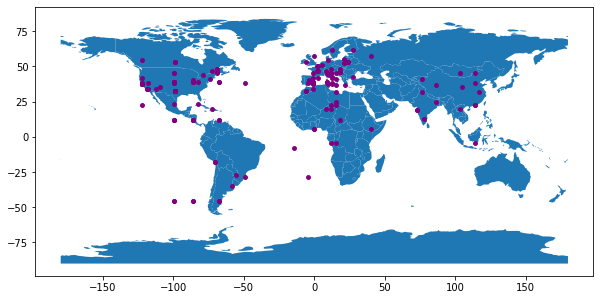

In [18]:
#PLOT
geometry = [Point(xy) for xy in zip(df_copy1['lon1'], df_copy1['lat1'])]
gdf = GeoDataFrame(df_copy1, geometry=geometry)   
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='purple', markersize=15);

> CIME call for given dataset of tweets

clean text

In [19]:
!pip install contractions
import contractions
import nltk
nltk.download('omw-1.4')
#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
import re  

def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_characters(text):
    return re.sub('[^a-zA-Z]', ' ', text)

def remove_url(text):
    return re.sub(r'http\S+', '', text)

def remove_contractions(text):
    return ' '.join([contractions.fix(word) for word in text.split()])

#defining the object for Lemmatization
lemmatizer = WordNetLemmatizer()
#defining a function for lemming
def lemmatize_words(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

def clean_text(text):
    text = remove_url(text)
    text = remove_contractions(text)
    text = text.lower()
    text = remove_punctuations(text)
    text = remove_characters(text)
    #text = stemming_words(text)
    text = lemmatize_words(text)
    return text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 8.2 MB/s eta 0:00:00


[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [20]:
# apply
df_copy1['text1'] = df_copy1['text'].apply(clean_text)
df_copy1.reset_index(drop=True,inplace=True)
df_copy1.shape

(262, 41)

In [21]:
N = len(df_copy1)

In [22]:
#confronto distanze TWITA w/ Cime

import pandas as pd
import requests
import time
import json

in_geo = []
out_geo = []
start_geo = time.time()
for idx, row in df_copy1[:N].iterrows():
    
    headers = {'Content-type': 'application/json'}
    body = {
        "text": row["text1"],
        "language": 'und' # <--- CHANGE HERE (language selector 2-char ISO code) suggested input are 'und','en,'it'
    }

    try:
        r = requests.post("http://131.175.120.2:20001/e2mc/CIME/v1.0/tweet/dev", headers=headers, data=json.dumps(body), auth=("cime","cime"))
        r.encoding = 'utf-8'
        json_res = json.loads(r.text)
        in_geo.append(row)
        out_geo.append(json_res)
        
    except Exception as e:
      print(e)
      print("Excepted, better luck next time...")

end_geo = time.time()
print('calculated geolocation of '+str(N)+' tweets with language code '+ 'und' + ' in: '+str(round((end_geo-start_geo),2))+' s')


df_geolocation_in = pd.DataFrame(in_geo) 
df_geolocation_out_und = pd.DataFrame(out_geo)
df_geolocation_out = df_geolocation_out_und.rename(columns={'CIME_geolocation_centre':'CIME_geolocation_centre_1','CIME_geolocation_osm':'CIME_geolocation_osm_1','CIME_geolocation_string':'CIME_geolocation_string_1'})
df_geolocation_out['Language_1'] = 'und'
  
df_geolocation_out = df_geolocation_out.drop(columns=['twitter_coordinates','twitter_language','twitter_place'])

calculated geolocation of 262 tweets with language code und in: 150.79 s


In [23]:
print(df_geolocation_in.shape)
print(df_geolocation_out.shape)

(262, 41)
(262, 5)


In [24]:
#df_geolocation_in = df_geolocation_in.drop(columns=['location_json','screen_name','date','timestamp','year','month','day','hour',	'source','urls','description','statuses_count','followers_count','friends_count','media','tokens'])
merged_output = pd.concat([df_geolocation_in, df_geolocation_out], axis=1)
merged_output.drop(columns = ['Language_1', 'Unnamed: 0'])

,Unnamed: 0.1,Unnamed: 0.1.1,author_id,lang,conversation_id,created_at,edit_history_tweet_ids,full_text,label,entities.urls,...,language,lat1,lon1,distance_Nominatim,geometry,text1,CIME_geolocation_centre_1,CIME_geolocation_osm_1,CIME_geolocation_string_1,message
0,2668,2668,11791512,ro,1407658084814708736,Wed Jun 23 11:13:35 +0000 2021,['1407658084814708736'],Random recipe password generator. https://t.co...,1,"[{'start': 34, 'end': 57, 'url': 'https://t.co...",...,ro,NaN,NaN,0,POINT EMPTY,random recipe password generator,[],[],[],NaN
1,2674,2674,34204102,ro,1156093768543506432,Tue Jul 30 06:46:48 +0000 2019,['1156093768543506432'],ALERT: Multiple vulnerabilities found in recen...,1,"[{'start': 84, 'end': 107, 'url': 'https://t.c...",...,ro,NaN,NaN,0,POINT EMPTY,alert multiple vulnerability found in recent v...,[],[],[],NaN
2,2673,2673,50026664,ro,1620455656204472322,Tue Jan 31 16:15:09 +0000 2023,['1620455656204472322'],Exploit released for critical VMware vRealize ...,1,"[{'start': 75, 'end': 98, 'url': 'https://t.co...",...,ro,12.906583,77.594847,0,POINT (77.59484653871468 12.9065832),exploit released for critical vmware vrealize ...,[],[],[],NaN
3,2676,2676,50026664,ro,1559330745356894213,Tue Aug 16 00:06:35 +0000 2022,['1559330745356894213'],Argentina's Judiciary of Córdoba hit by PLAY r...,1,"[{'start': 81, 'end': 104, 'url': 'https://t.c...",...,ro,-28.668037,-49.338347,0,POINT (-49.3383467 -28.6680373),argentina s judiciary of cordoba hit by play r...,"[[-64.183319, -31.4173391]]","[{'CIME_ranking': 53.333333333333336, 'admin_l...","[Córdoba, Municipio de Córdoba, Pedanía Capita...",NaN
4,2676,2676,50026664,ro,1559330745356894213,Tue Aug 16 00:06:35 +0000 2022,['1559330745356894213'],Argentina's Judiciary of Córdoba hit by PLAY r...,1,"[{'start': 81, 'end': 104, 'url': 'https://t.c...",...,ro,-28.668037,-4.776014,0,POINT (-4.7760138 -28.6680373),argentina s judiciary of cordoba hit by play r...,"[[-64.183319, -31.4173391]]","[{'CIME_ranking': 53.333333333333336, 'admin_l...","[Córdoba, Municipio de Córdoba, Pedanía Capita...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1541,1541,1290574179729891336,pl,1499298797926629380,2022-03-03T08:21:03.000Z,['1499298797926629380'],Informacje dotyczące zagrożenia #HermeticWiper...,1,"[{'start': 48, 'end': 71, 'url': 'https://t.co...",...,pl,NaN,NaN,0,POINT EMPTY,informacje dotyczace zagrozenia hermeticwiper,[],[],[],NaN
258,1542,1542,1290574179729891336,pl,1572501963421650944,2022-09-21T08:24:18.000Z,['1572501963421650944'],Zapraszamy do zapoznania się z najnowszą publi...,1,"[{'start': 133, 'end': 156, 'url': 'https://t....",...,pl,NaN,NaN,0,POINT EMPTY,zapraszamy do zapoznania sie z najnowsza publi...,"[[26.744499, 49.63657], [30.827225, 46.637043]...","[{'CIME_ranking': 100.0, 'admin_level': 15, 'n...","[Світле, Красилівський район, Хмельницька обла...",NaN
259,1543,1543,1290574179729891336,pl,1501537347187658755,2022-03-09T12:36:15.000Z,['1501537347187658755'],Informacje dotyczące zagrożenia #HermeticWiper...,1,"[{'start': 57, 'end': 80, 'url': 'https://t.co...",...,pl,NaN,NaN,0,POINT EMPTY,informacje dotyczace zagrozenia hermeticwiper ...,[],[],[],NaN
260,1544,1544,1290574179729891336,pl,1509799545479254024,2022-04-01T07:47:17.000Z,['1509799545479254024'],Dostępna jest nowa wersja #iOS - 15.4.1. Aktua...,1,NaN,...,pl,NaN,NaN,0,POINT EMPTY,dostepna jest nowa wersja io aktualizacja lata...,[],[],[],NaN


In [25]:
# Explode
merged_output = merged_output.explode('CIME_geolocation_centre_1')
merged_output


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,author_id,lang,conversation_id,created_at,edit_history_tweet_ids,full_text,label,...,lat1,lon1,distance_Nominatim,geometry,text1,CIME_geolocation_centre_1,CIME_geolocation_osm_1,CIME_geolocation_string_1,message,Language_1
0,0,2668,2668,11791512,ro,1407658084814708736,Wed Jun 23 11:13:35 +0000 2021,['1407658084814708736'],Random recipe password generator. https://t.co...,1,...,NaN,NaN,0,POINT EMPTY,random recipe password generator,NaN,[],[],NaN,und
1,20,2674,2674,34204102,ro,1156093768543506432,Tue Jul 30 06:46:48 +0000 2019,['1156093768543506432'],ALERT: Multiple vulnerabilities found in recen...,1,...,NaN,NaN,0,POINT EMPTY,alert multiple vulnerability found in recent v...,NaN,[],[],NaN,und
2,40,2673,2673,50026664,ro,1620455656204472322,Tue Jan 31 16:15:09 +0000 2023,['1620455656204472322'],Exploit released for critical VMware vRealize ...,1,...,12.906583,77.594847,0,POINT (77.59484653871468 12.9065832),exploit released for critical vmware vrealize ...,NaN,[],[],NaN,und
3,41,2676,2676,50026664,ro,1559330745356894213,Tue Aug 16 00:06:35 +0000 2022,['1559330745356894213'],Argentina's Judiciary of Córdoba hit by PLAY r...,1,...,-28.668037,-49.338347,0,POINT (-49.3383467 -28.6680373),argentina s judiciary of cordoba hit by play r...,"[-64.183319, -31.4173391]","[{'CIME_ranking': 53.333333333333336, 'admin_l...","[Córdoba, Municipio de Córdoba, Pedanía Capita...",NaN,und
4,41,2676,2676,50026664,ro,1559330745356894213,Tue Aug 16 00:06:35 +0000 2022,['1559330745356894213'],Argentina's Judiciary of Córdoba hit by PLAY r...,1,...,-28.668037,-4.776014,0,POINT (-4.7760138 -28.6680373),argentina s judiciary of cordoba hit by play r...,"[-64.183319, -31.4173391]","[{'CIME_ranking': 53.333333333333336, 'admin_l...","[Córdoba, Municipio de Córdoba, Pedanía Capita...",NaN,und
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,555,1542,1542,1290574179729891336,pl,1572501963421650944,2022-09-21T08:24:18.000Z,['1572501963421650944'],Zapraszamy do zapoznania się z najnowszą publi...,1,...,NaN,NaN,0,POINT EMPTY,zapraszamy do zapoznania sie z najnowsza publi...,"[30.827225, 46.637043]","[{'CIME_ranking': 100.0, 'admin_level': 15, 'n...","[Світле, Красилівський район, Хмельницька обла...",NaN,und
258,555,1542,1542,1290574179729891336,pl,1572501963421650944,2022-09-21T08:24:18.000Z,['1572501963421650944'],Zapraszamy do zapoznania się z najnowszą publi...,1,...,NaN,NaN,0,POINT EMPTY,zapraszamy do zapoznania sie z najnowsza publi...,"[36.7073106, 47.5504773]","[{'CIME_ranking': 100.0, 'admin_level': 15, 'n...","[Світле, Красилівський район, Хмельницька обла...",NaN,und
259,556,1543,1543,1290574179729891336,pl,1501537347187658755,2022-03-09T12:36:15.000Z,['1501537347187658755'],Informacje dotyczące zagrożenia #HermeticWiper...,1,...,NaN,NaN,0,POINT EMPTY,informacje dotyczace zagrozenia hermeticwiper ...,NaN,[],[],NaN,und
260,557,1544,1544,1290574179729891336,pl,1509799545479254024,2022-04-01T07:47:17.000Z,['1509799545479254024'],Dostępna jest nowa wersja #iOS - 15.4.1. Aktua...,1,...,NaN,NaN,0,POINT EMPTY,dostepna jest nowa wersja io aktualizacja lata...,NaN,[],[],NaN,und


In [26]:
# # Remove empty
merged_output = merged_output[~(merged_output.CIME_geolocation_centre_1.isnull())]

locations_1 = pd.DataFrame(merged_output['CIME_geolocation_centre_1'].tolist(), columns=['lon2','lat2'])

merged_output = pd.concat([merged_output.reset_index(), locations_1], axis=1)
merged_output
#apply for each row haversine distance
# merged_output['distance_Cime_1'] = merged_output.apply(lambda row: haversine(row), axis=1)
# merged_output.drop(columns=['level_0'])

,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,author_id,lang,conversation_id,created_at,edit_history_tweet_ids,full_text,...,distance_Nominatim,geometry,text1,CIME_geolocation_centre_1,CIME_geolocation_osm_1,CIME_geolocation_string_1,message,Language_1,lon2,lat2
0,3,41,2676,2676,50026664,ro,1559330745356894213,Tue Aug 16 00:06:35 +0000 2022,['1559330745356894213'],Argentina's Judiciary of Córdoba hit by PLAY r...,...,0,POINT (-49.3383467 -28.6680373),argentina s judiciary of cordoba hit by play r...,"[-64.183319, -31.4173391]","[{'CIME_ranking': 53.333333333333336, 'admin_l...","[Córdoba, Municipio de Córdoba, Pedanía Capita...",NaN,und,-64.183319,-31.417339
1,4,41,2676,2676,50026664,ro,1559330745356894213,Tue Aug 16 00:06:35 +0000 2022,['1559330745356894213'],Argentina's Judiciary of Córdoba hit by PLAY r...,...,0,POINT (-4.7760138 -28.6680373),argentina s judiciary of cordoba hit by play r...,"[-64.183319, -31.4173391]","[{'CIME_ranking': 53.333333333333336, 'admin_l...","[Córdoba, Municipio de Córdoba, Pedanía Capita...",NaN,und,-64.183319,-31.417339
2,5,41,2676,2676,50026664,ro,1559330745356894213,Tue Aug 16 00:06:35 +0000 2022,['1559330745356894213'],Argentina's Judiciary of Córdoba hit by PLAY r...,...,0,POINT (-49.3383467 37.8845813),argentina s judiciary of cordoba hit by play r...,"[-64.183319, -31.4173391]","[{'CIME_ranking': 53.333333333333336, 'admin_l...","[Córdoba, Municipio de Córdoba, Pedanía Capita...",NaN,und,-64.183319,-31.417339
3,6,41,2676,2676,50026664,ro,1559330745356894213,Tue Aug 16 00:06:35 +0000 2022,['1559330745356894213'],Argentina's Judiciary of Córdoba hit by PLAY r...,...,0,POINT (-4.7760138 37.8845813),argentina s judiciary of cordoba hit by play r...,"[-64.183319, -31.4173391]","[{'CIME_ranking': 53.333333333333336, 'admin_l...","[Córdoba, Municipio de Córdoba, Pedanía Capita...",NaN,und,-64.183319,-31.417339
4,7,80,1692,1692,64812324,it,1326184195463536642,Tue Nov 10 15:25:26 +0000 2020,['1326184195463536642'],Warning: Cisco patched critical vulnerabilitie...,...,0,POINT (-98.97971649999999 32.3828077),warning cisco patched critical vulnerability a...,"[-98.9797165, 32.3828077]","[{'CIME_ranking': 53.333333333333336, 'admin_l...","[Cisco, Eastland County, Texas]",NaN,und,-98.979716,32.382808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,243,529,1386,1386,1281147967873978368,pl,1499760594043473928,2022-03-04T14:56:04.000Z,['1499760594043473928'],⚠️Ostrzegamy przed fałszywymi wiadomościami e-...,...,0,POINT EMPTY,ostrzegamy przed falszywymi wiadomosciami e ma...,"[17.9977874, 53.1123984]","[{'CIME_ranking': 105.0, 'admin_level': 15, 'n...","[PKOBP, Gdańska, Śródmieście, Śródmieście-Boci...",NaN,und,17.997787,53.112398
151,243,529,1386,1386,1281147967873978368,pl,1499760594043473928,2022-03-04T14:56:04.000Z,['1499760594043473928'],⚠️Ostrzegamy przed fałszywymi wiadomościami e-...,...,0,POINT EMPTY,ostrzegamy przed falszywymi wiadomosciami e ma...,"[21.9819682, 50.0512816]","[{'CIME_ranking': 105.0, 'admin_level': 15, 'n...","[PKOBP, Gdańska, Śródmieście, Śródmieście-Boci...",NaN,und,21.981968,50.051282
152,258,555,1542,1542,1290574179729891336,pl,1572501963421650944,2022-09-21T08:24:18.000Z,['1572501963421650944'],Zapraszamy do zapoznania się z najnowszą publi...,...,0,POINT EMPTY,zapraszamy do zapoznania sie z najnowsza publi...,"[26.744499, 49.63657]","[{'CIME_ranking': 100.0, 'admin_level': 15, 'n...","[Світле, Красилівський район, Хмельницька обла...",NaN,und,26.744499,49.636570
153,258,555,1542,1542,1290574179729891336,pl,1572501963421650944,2022-09-21T08:24:18.000Z,['1572501963421650944'],Zapraszamy do zapoznania się z najnowszą publi...,...,0,POINT EMPTY,zapraszamy do zapoznania sie z najnowsza publi...,"[30.827225, 46.637043]","[{'CIME_ranking': 100.0, 'admin_level': 15, 'n...","[Світле, Красилівський район, Хмельницька обла...",NaN,und,30.827225,46.637043


In [27]:
# merged_output.drop_duplicates(subset='tweet_id', keep='first', inplace=True)
# merged_output


In [28]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
import pandas as pd
import numpy as np

TWITA_map = folium.Map(width='70%', height='70%', prefer_canvas=True, min_zoom = 2)
for i in range(0, len(merged_output)):
    location = [merged_output.at[i,'lat2'], merged_output.at[i,'lon2']]
#     print(location)
    folium.Marker(location, popup = str(location), icon=folium.Icon(color='lightgreen')).add_to(TWITA_map)
minimap = plugins.MiniMap()
TWITA_map.add_child(minimap)

TWITA_map

In [29]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
import pandas as pd
import numpy as np

# Create a new map
TWITA_map = folium.Map(width='70%', height='70%', prefer_canvas=True, min_zoom=2)

# Add markers to the map
for i in range(len(merged_output)):
    location = [merged_output.at[i, 'lat2'], merged_output.at[i, 'lon2']]
    popup = merged_output.at[i, 'CIME_geolocation_string_1']  # Use the CIME_geolocation_string_1 column
    folium.Marker(location, popup=popup, icon=folium.Icon(color='lightgreen')).add_to(TWITA_map)

# Add a minimap to the map
minimap = plugins.MiniMap()
TWITA_map.add_child(minimap)

# Apply a different map style
folium.TileLayer('cartodbpositron').add_to(TWITA_map)

# Display the map
TWITA_map


In [30]:
merged_output.columns

Index(['index', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'author_id',
       'lang', 'conversation_id', 'created_at', 'edit_history_tweet_ids',
       'full_text', 'label', 'entities.urls', 'entities.annotations',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'public_metrics.impression_count', 'entities.mentions',
       'entities.hashtags', 'referenced_tweets', 'geo.place_id', 'tweet_id',
       'possibly_sensitive', 'hashtags', 'user_mentions', 'screen_name',
       'description', 'user_location', 'full_text1', 'predictions',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'entities.cashtags', 'full_text_clean', 'text', 'language', 'lat1',
       'lon1', 'distance_Nominatim', 'geometry', 'text1',
       'CIME_geolocation_centre_1', 'CIME_geolocation_osm_1',
       'CIME_geolocation_string_1', 'message', 'Language_1', 'lon2', 'lat2'],
      dtype='object')

In [31]:
merged_output['CIME_geolocation_string_1']

0      [Córdoba, Municipio de Córdoba, Pedanía Capita...
1      [Córdoba, Municipio de Córdoba, Pedanía Capita...
2      [Córdoba, Municipio de Córdoba, Pedanía Capita...
3      [Córdoba, Municipio de Córdoba, Pedanía Capita...
4                        [Cisco, Eastland County, Texas]
                             ...                        
150    [PKOBP, Gdańska, Śródmieście, Śródmieście-Boci...
151    [PKOBP, Gdańska, Śródmieście, Śródmieście-Boci...
152    [Світле, Красилівський район, Хмельницька обла...
153    [Світле, Красилівський район, Хмельницька обла...
154    [Світле, Красилівський район, Хмельницька обла...
Name: CIME_geolocation_string_1, Length: 155, dtype: object

In [32]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
import pandas as pd

TWITA_map = folium.Map(width='100%', height='100%', prefer_canvas=True, min_zoom=2)

for i in range(len(merged_output)):
    location = [merged_output.at[i, 'lat2'], merged_output.at[i, 'lon2']]
    popup = merged_output.at[i, 'CIME_geolocation_string_1'][0].split()[0]  # Extract the first word from the list
    folium.Marker(location, popup=popup, icon=folium.Icon(color='darkblue')).add_to(TWITA_map)

minimap = plugins.MiniMap()
TWITA_map.add_child(minimap)

folium.TileLayer('cartodbpositron').add_to(TWITA_map)

TWITA_map
# {'lightgreen', 'black', 'lightblue', 'orange', 'darkgreen', 'gray', 'cadetblue', 'purple', 'pink', 'white', 'beige', 'blue', 'lightgray', 'red', 'lightred', 'darkred', 'darkblue', 'green', 'darkpurple'}.
#   # This is added back by InteractiveShellApp.init_path()